In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/philippe/MolGenDocking


/home/philippe/miniconda3/envs/MolGen/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from notebooks.utils import *

import pandas as pd

In [3]:
df = pd.read_csv("mol_gen_docking/reward/oracles/properties.csv")

In [4]:
df

,smiles,GSK3B,JNK3,DRD2,SA,QED,CalcExactMolWt,CalcNumAromaticRings,CalcNumHBA,CalcNumHBD,...,logP,3pbl_docking,1iep_docking,2rgp_docking,3eml_docking,3ny8_docking,4rlu_docking,4unn_docking,5mo4_docking,7l11_docking
0,CCOC(=O)[C@H]1CC[C@H](NC(=O)N2CCC(OCc3ccccc3C)...,0.01,0.00,0.001419,3.019514,0.758498,388.236208,1.0,4.0,1.0,...,0.879015,-8.8,-8.0,-8.7,-8.0,-8.9,-8.5,-7.4,-7.4,-5.6
1,COc1ccc(C(=O)N/N=C/C=C2\N(C)c3ccccc3C2(C)C)cc1OC,0.00,0.02,0.002025,2.400464,0.635107,379.189592,2.0,5.0,1.0,...,1.840263,-8.7,-7.4,-6.1,-8.1,-8.2,-8.6,-6.3,-7.0,-5.4
2,O=S(=O)([N-]c1cccc(Cl)c1F)c1ccc(Cl)c(Cl)c1,0.01,0.01,0.006074,3.132518,0.763013,351.917434,2.0,2.0,0.0,...,1.972297,-8.0,-7.8,-7.8,-8.1,-8.7,-8.3,-7.7,-7.8,-6.6
3,Cc1noc(Cl)c1CCC(=O)Nc1ccc2c(c1)nc(C1CC1)n2C,0.00,0.00,0.002350,2.525698,0.748485,358.119654,3.0,5.0,1.0,...,1.857984,-8.5,-8.7,-9.4,-8.0,-9.5,-9.9,-7.8,-8.2,-6.3
4,O=C(CSc1nnc([S-])s1)NCCc1c[nH]c2ccccc12,0.03,0.01,0.001381,2.788272,0.528065,349.025698,3.0,6.0,2.0,...,0.430512,-8.2,-7.7,-8.3,-7.9,-8.5,-9.3,-7.6,-7.9,-6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Cn1c([S-])nnc1-c1cc(C(C)(C)C)nn1Cc1ccc(F)cc1,0.00,0.02,0.000867,2.985981,0.685317,344.135068,3.0,6.0,0.0,...,0.676538,-6.9,-5.2,-6.7,-8.1,-6.3,-7.5,-7.9,-6.6,-6.3
1020,C[C@H]1CCc2[nH]c(=O)c(C(=O)NCC[NH+](C)C)cc2C1,0.01,0.01,0.064161,3.916990,0.686689,278.186303,1.0,2.0,3.0,...,-3.016756,-7.0,-6.4,-7.4,-7.2,-7.6,-7.7,-6.7,-7.4,-5.7
1021,O=C(Cn1nc([O-])c2ccccc2c1=O)Nc1ccc2c(c1)CC(=O)N2,0.10,0.07,0.000258,2.640914,0.718317,349.094228,3.0,6.0,2.0,...,-0.628681,-10.8,-11.0,-9.8,-9.9,-10.5,-11.0,-9.8,-9.3,-8.0
1022,CCc1nn2c(c1-c1ccc(Cl)cc1)NC(=O)[C@@H]2CC(=O)NC...,0.13,0.00,0.001313,3.028440,0.603644,422.150954,3.0,4.0,2.0,...,1.280123,-9.1,-9.8,-10.5,-4.8,-8.8,-9.5,-8.9,-9.1,-6.6


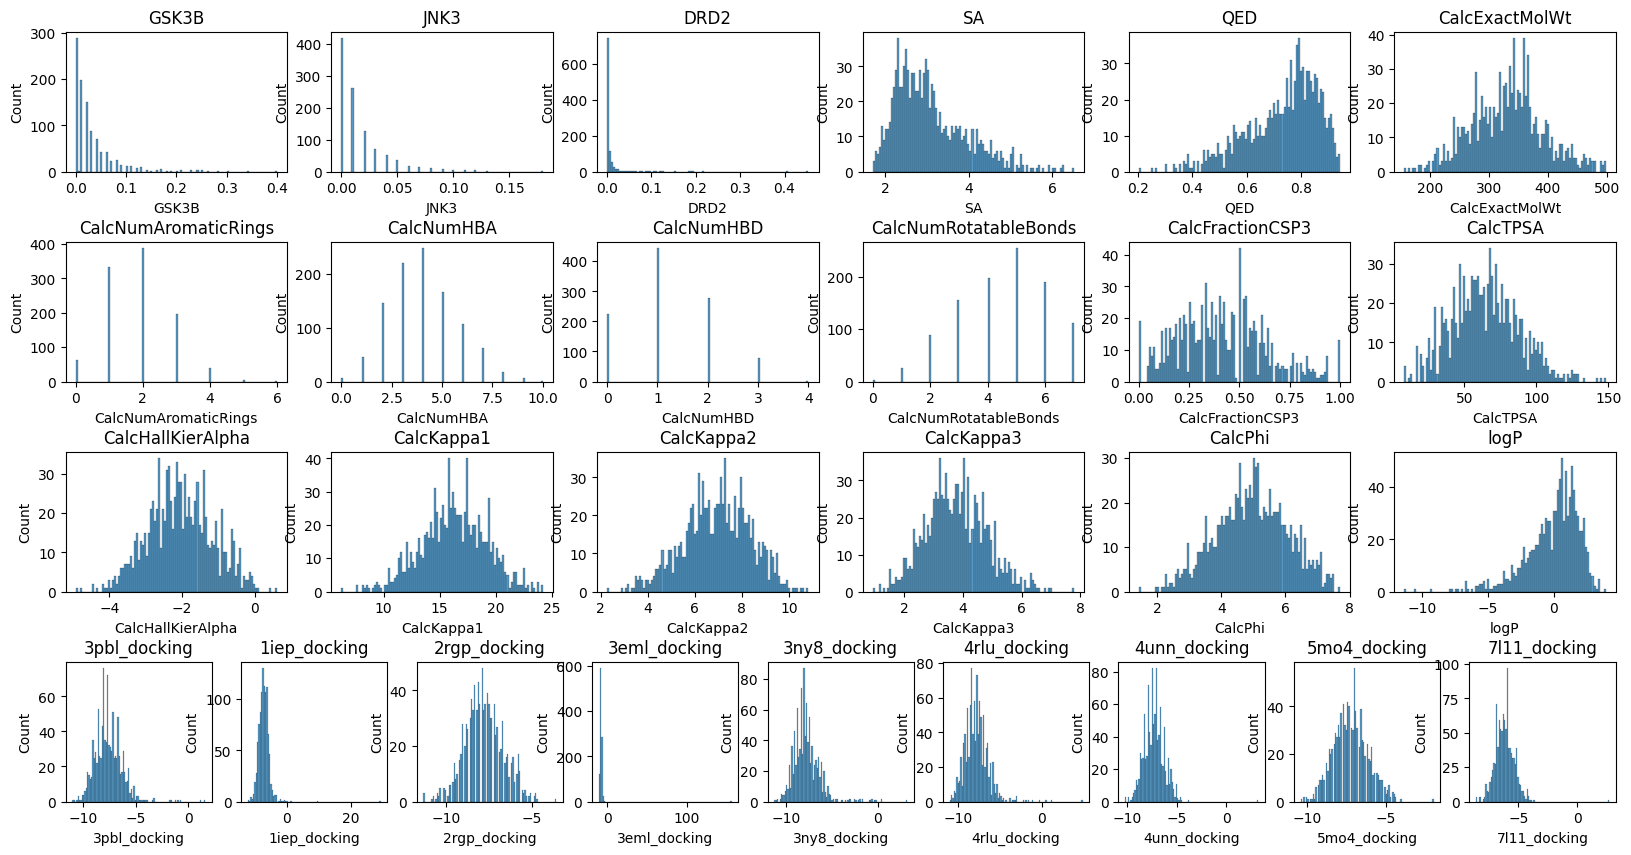

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))

N_COLS = 4
outer_grid = fig.add_gridspec(N_COLS, 1, wspace=0.1, hspace=0.5)


i = 0
j = 0
n_cols = (df.shape[1]-1) // N_COLS

grid = outer_grid[0].subgridspec(1, ncols=n_cols)

for col in df.columns:
    if not col == "smiles":
        ax = plt.subplot(grid[i])
        sns.histplot(df[col], bins=100, ax=ax)
        ax.set_title(col)
        i += 1
        if i == n_cols and not j == N_COLS - 1:
            i = 0
            j += 1
            if j == N_COLS - 1:
                grid = outer_grid[j].subgridspec(1, ncols=n_cols + (df.shape[1]-1) % N_COLS)
            else:
                grid = outer_grid[j].subgridspec(1, ncols=n_cols)
